In [1]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Load dataset
data_path = "ajayf_project.csv"
df = pd.read_csv(data_path)

In [3]:
display(df.head())

,State,District,Block,Village,pH,EC,CO3,HCO3,Cl,SO4,NO3,TH,Ca,Mg,Na,K,F,TDS,WQI,Water Quality Classification
0,Gujarat,Ahmedabad,Mandal,Dalod,8.20,16640.0,40.37,1257.0,5176.0,822.00,26.00,1451,152.0,260.0,3535.0,45.0,1.00,11149,4361.44,Unsuitable for Drinking
1,Himachal Pradesh,Solan,Nallagarh,JAGATPUR,8.44,299.0,43.00,87.0,21.0,70.92,2.70,84,17.0,10.0,39.0,2.4,0.20,262,85.80,Good
2,Maharashtra,Ahmednagar,SANGAMNER,Kokangaon,7.90,1315.0,40.37,518.7,120.5,61.60,18.20,465,80.2,64.4,88.3,1.6,0.53,372,280.04,Very Poor yet Drinkable
3,Gujarat,Ahmedabad,Viramgam,Endla,7.40,715.0,40.37,354.0,50.0,18.00,0.23,280,56.0,34.0,47.0,11.0,0.46,479,195.12,Poor
4,Himachal Pradesh,Solan,Nallagarh,BARUNA,8.40,270.0,43.00,87.0,14.0,70.92,10.00,116,10.0,18.0,23.0,1.0,0.12,262,81.78,Good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19029 entries, 0 to 19028
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   State                         19029 non-null  object 
 1   District                      19029 non-null  object 
 2   Block                         17910 non-null  object 
 3   Village                       19028 non-null  object 
 4   pH                            19029 non-null  float64
 5   EC                            19029 non-null  float64
 6   CO3                           19029 non-null  float64
 7   HCO3                          19029 non-null  float64
 8   Cl                            19029 non-null  float64
 9   SO4                           19029 non-null  float64
 10  NO3                           19029 non-null  float64
 11  TH                            19029 non-null  int64  
 12  Ca                            19029 non-null  float64
 13  M

In [5]:
df.describe()

,pH,EC,CO3,HCO3,Cl,SO4,NO3,TH,Ca,Mg,Na,K,F,TDS,WQI
count,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000
mean,7.713496,1191.620744,40.370179,297.211813,171.861553,70.924142,38.190930,327.841978,65.117457,40.573490,113.733632,13.574603,0.623357,723.774239,305.291812
std,0.491415,1348.094278,10.812567,180.502497,349.917561,148.203471,54.506277,310.387226,62.016528,49.626458,200.534660,38.820400,1.814000,755.575601,315.477128
min,2.800000,2.290000,1.000000,1.200000,0.260000,0.020000,0.000000,3.000000,1.000000,0.040000,0.100000,0.030000,-0.160000,15.000000,9.040000
25%,7.450000,524.000000,40.370000,177.000000,32.000000,15.000000,7.490000,165.000000,28.100000,15.600000,28.000000,1.800000,0.250000,345.000000,146.640000
50%,7.720000,860.000000,40.370000,281.000000,78.000000,35.000000,25.000000,260.000000,50.100000,29.000000,61.000000,3.800000,0.480000,587.000000,232.080000
75%,8.000000,1390.000000,40.370000,390.400000,175.000000,70.920000,43.000000,400.000000,80.000000,49.800000,121.000000,10.000000,0.770000,913.000000,359.720000
max,10.920000,26520.000000,368.000000,3112.000000,9217.000000,7601.000000,1534.900000,8607.000000,1840.000000,1483.500000,5489.000000,1353.000000,168.000000,17768.000000,6850.890000


In [6]:
# Checking for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 State                              0
District                           0
Block                           1119
Village                            1
pH                                 0
EC                                 0
CO3                                0
HCO3                               0
Cl                                 0
SO4                                0
NO3                                0
TH                                 0
Ca                                 0
Mg                                 0
Na                                 0
K                                  0
F                                  0
TDS                                0
WQI                                0
Water Quality Classification       0
dtype: int64


In [7]:
# Drop non-numeric columns
df = df.drop(columns=['State', 'District', 'Block', 'Village', 'Water Quality Classification'], errors='ignore')

In [8]:
# Define features and target
X = df.drop(columns=['WQI'])
y = df['WQI']

In [9]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Train Random Forest Regressor Model with further regularization
rf_regressor = RandomForestRegressor(
    n_estimators=30,max_depth=4, # Reduced depth to control complexity
    min_samples_split=20,  # Increased min samples required to split
    min_samples_leaf=15,  # Increased min samples per leaf to generalize better
    bootstrap=True,
    random_state=42
)
rf_regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=15, min_samples_split=20,
                      n_estimators=30, random_state=42)

In [12]:
# Feature Importance Analysis
feature_importances = pd.Series(rf_regressor.feature_importances_, index=X.columns)
print("Feature Importances:")
print(feature_importances.sort_values(ascending=False))

Feature Importances:
EC      0.895207
TDS     0.099986
Cl      0.004755
Na      0.000052
pH      0.000000
CO3     0.000000
SO4     0.000000
HCO3    0.000000
NO3     0.000000
TH      0.000000
Mg      0.000000
Ca      0.000000
K       0.000000
F       0.000000
dtype: float64


In [13]:
# Predict
y_pred = rf_regressor.predict(X_test_scaled)

In [14]:
# Define Contamination Levels Based on WQI
contamination_levels = ['High Contamination', 'Moderate Contamination', 'Low Contamination']
def classify_contamination(wqi):
    if wqi >= 300:
        return "High contamination"
    elif wqi >= 200:
        return "Moderate contamination"
    elif wqi >= 100:
        return "Low contamination"
    else:
        return "Good quality"

In [15]:
# Apply classification to predictions
contamination_predictions = [classify_contamination(wqi) for wqi in y_pred]
df_results = pd.DataFrame({'Actual WQI': y_test, 'Predicted WQI': y_pred, 'Predicted Contamination': contamination_predictions})
print(df_results.head())

       Actual WQI  Predicted WQI Predicted Contamination
2141       184.41     212.323232  Moderate contamination
18339      214.48     212.323232  Moderate contamination
980        180.73     212.323232  Moderate contamination
326        200.68     212.323232  Moderate contamination
12083      339.54     298.034524  Moderate contamination


In [16]:
# Define Fuzzy Logic Variables
quality = ctrl.Consequent(np.arange(0, 101, 1), 'quality')
EC = ctrl.Antecedent(np.arange(0, 5000, 1), 'EC')
TDS = ctrl.Antecedent(np.arange(0, 2000, 1), 'TDS')
NO3 = ctrl.Antecedent(np.arange(0, 100, 1), 'NO3')
SO4 = ctrl.Antecedent(np.arange(0, 500, 1), 'SO4')
pH = ctrl.Antecedent(np.arange(0, 14, 0.1), 'pH')

In [17]:
# Auto-generate membership functions
pH.automf(3)
TDS.automf(3)
EC.automf(3)
NO3.automf(3)
SO4.automf(3)

In [18]:
# Define quality membership functions
quality['very poor'] = fuzz.trimf(quality.universe, [0, 10, 30])
quality['poor'] = fuzz.trimf(quality.universe, [10, 25, 50])
quality['moderate'] = fuzz.trimf(quality.universe, [25, 50, 75])
quality['good'] = fuzz.trimf(quality.universe, [50, 75, 90])
quality['very good'] = fuzz.trimf(quality.universe, [75, 90, 100])

In [19]:
# Define additional fuzzy rules
rules = [
    ctrl.Rule(pH['poor'] | TDS['poor'] | EC['poor'] | NO3['poor'] | SO4['poor'], quality['very poor']),
    ctrl.Rule((pH['poor'] & TDS['average']) | (EC['poor'] & NO3['average']) | (SO4['poor'] & pH['average']), quality['poor']),
    ctrl.Rule(pH['average'] & TDS['average'] & EC['average'] & NO3['average'] & SO4['average'], quality['moderate']),
    ctrl.Rule((pH['good'] & TDS['average']) | (EC['good'] & NO3['good']) | (SO4['good'] & pH['average']), quality['good']),
    ctrl.Rule(pH['good'] & TDS['good'] & EC['good'] & NO3['good'] & SO4['good'], quality['very good'])
]

In [20]:
# Create fuzzy control system
quality_ctrl = ctrl.ControlSystem(rules)
quality_sim = ctrl.ControlSystemSimulation(quality_ctrl)

In [21]:
# Example Input for Testing Model
example_test_input = np.median(X_train, axis=0).tolist()
example_test_scaled = scaler.transform([example_test_input])
test_wqi = rf_regressor.predict(example_test_scaled)[0]
test_contamination = classify_contamination(test_wqi)
print(f"Test Input: {example_test_input}")
print(f"Predicted WQI: {test_wqi:.2f}")
print(f"Predicted Contamination Level: {test_contamination}")

Test Input: [7.71, 857.0, 40.37, 281.0, 78.0, 35.0, 25.0, 260.0, 50.1, 29.0, 60.0, 3.8, 0.48, 586.0]
Predicted WQI: 222.11
Predicted Contamination Level: Moderate contamination


C:\Users\vijay\miniconda3\envs\tf-gpu\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


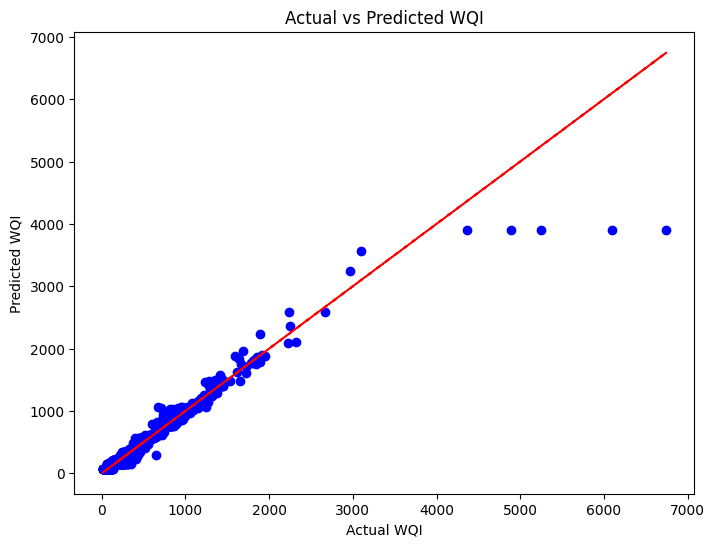

In [22]:
# Plot Actual vs Predicted WQI
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red', linestyle='dashed')  # Perfect fit line
plt.xlabel("Actual WQI")
plt.ylabel("Predicted WQI")
plt.title("Actual vs Predicted WQI")
plt.show()

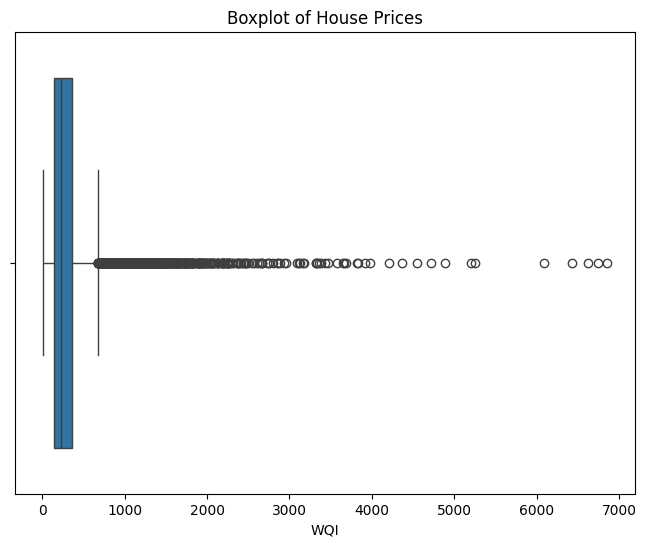

In [23]:
# Box Plots for Key Features
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="WQI")
plt.title("Boxplot of House Prices")
plt.show()

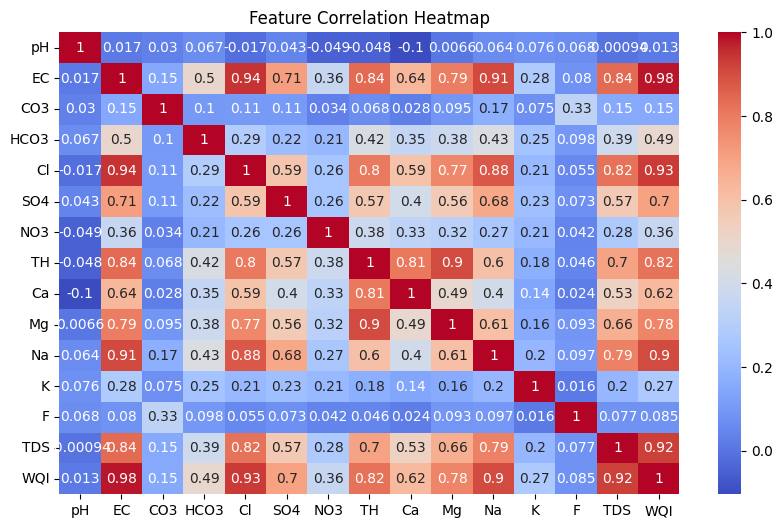

In [24]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

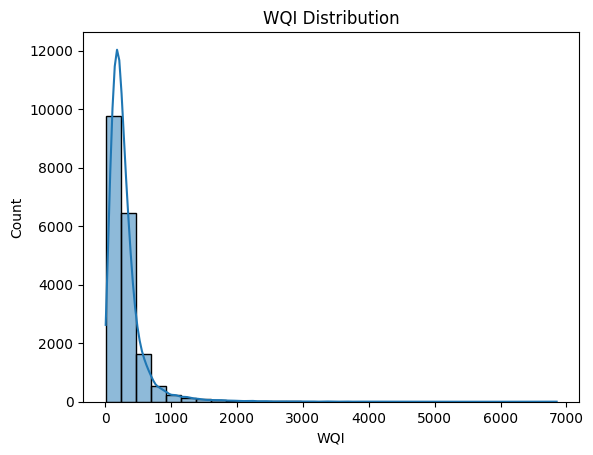

In [25]:
# Distribution Plot for WQI
sns.histplot(df['WQI'], bins=30, kde=True)
plt.title("WQI Distribution")
plt.show()

In [26]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

# Cross-validation
cv_scores = cross_val_score(rf_regressor, X_train_scaled, y_train, cv=3, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R² Score: {np.mean(cv_scores):.2f}")

Mean Squared Error: 5648.92
R² Score: 0.95
Mean Absolute Error: 27.39
Cross-Validation R² Scores: [0.97221666 0.93601772 0.96306302]
Mean CV R² Score: 0.96


In [27]:
# Example Input for Testing Random Forest Regressor
example_test_input = np.mean(X_train, axis=0).tolist()
example_test_scaled = scaler.transform([example_test_input])
test_wqi = rf_regressor.predict(example_test_scaled)[0]
test_contamination = classify_contamination(test_wqi)

print(f"Test Input: {example_test_input}")
print(f"Predicted WQI: {test_wqi:.2f}")
print(f"Predicted Contamination Level: {test_contamination}")


Test Input: [7.710813900019706, 1186.5909768114036, 40.36911778230309, 297.2169434408462, 170.57934835446363, 71.12662484398608, 37.76037049201866, 326.3425080470341, 64.90509754976023, 40.330516323983446, 113.34853642514616, 13.791684950403994, 0.628321618603429, 721.6840307429547]
Predicted WQI: 312.33
Predicted Contamination Level: High contamination


C:\Users\vijay\miniconda3\envs\tf-gpu\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


C:\Users\vijay\miniconda3\envs\tf-gpu\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


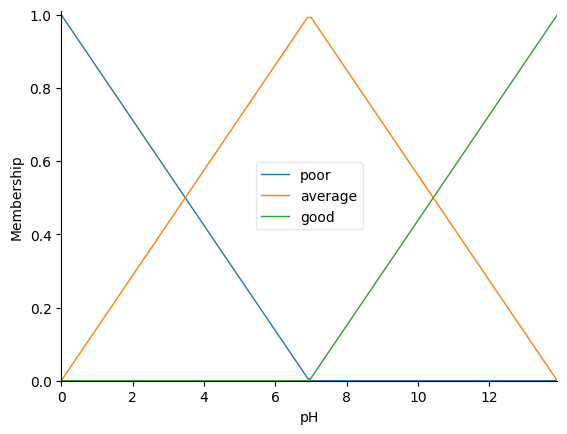

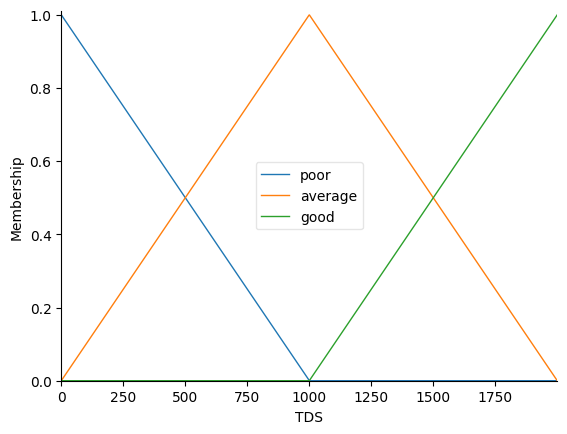

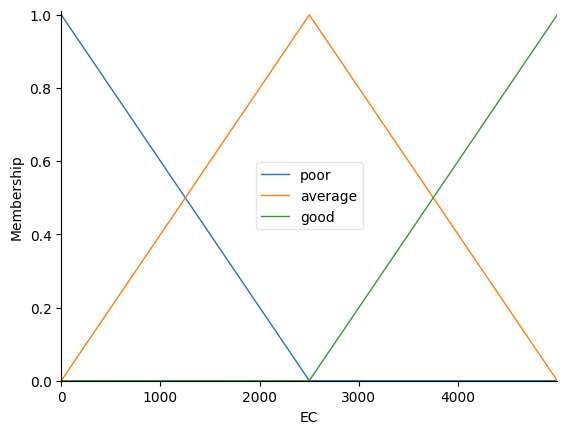

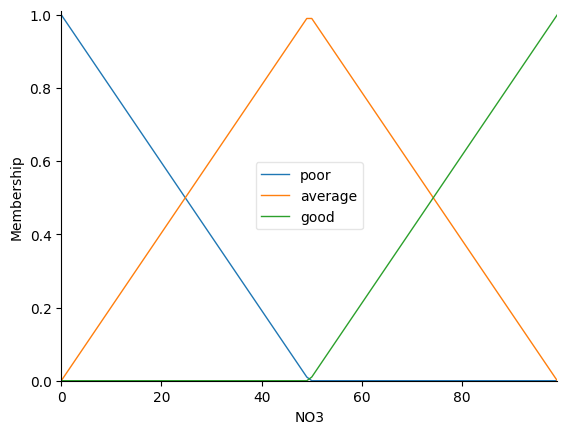

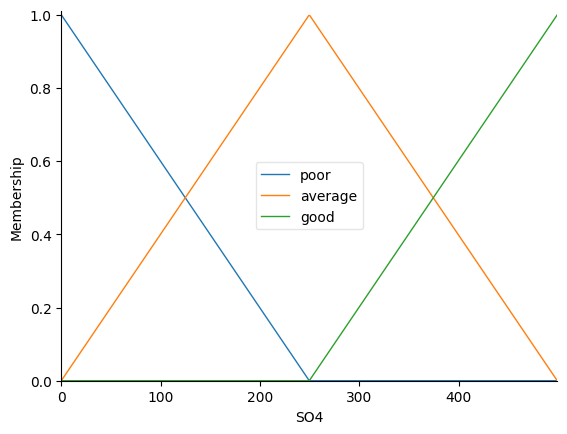

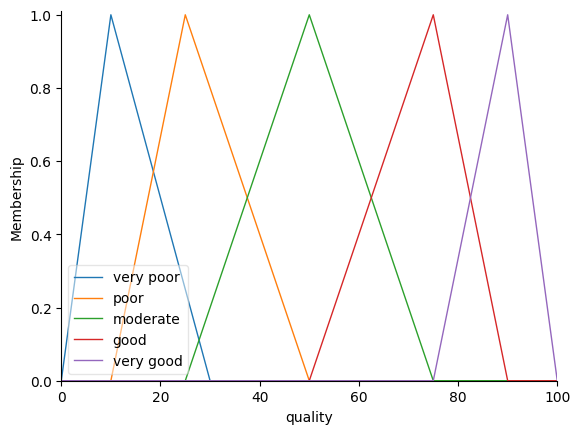

In [28]:
# Just call .view() on each fuzzy variable like this:
pH.view()
TDS.view()
EC.view()  #Electrical conductivity
NO3.view()
SO4.view()
quality.view()


In [29]:
import gradio as gr
import numpy as np

# Assuming `rf_regressor` and `scaler` are already loaded from your training script

# Function to classify the WQI (Water Quality Index) based on predicted value
def classify_contamination(wqi):
    if wqi >= 300:
        return "🔴 High contamination"
    elif wqi >= 200:
        return "🟠 Moderate contamination"
    elif wqi >= 100:
        return "🟡 Low contamination"
    else:
        return "🟢 Good quality"

# Prediction function using already loaded model and scaler
def predict_wqi(pH, TDS, EC, NO3, SO4):
    # Input data - assuming your model was trained on 14 features
    # Add default values (e.g., 0) for the missing features (the ones not in input)
    # Replace these zeros with the correct values if needed
    full_input = np.array([[EC, TDS, NO3, SO4, pH] + [0] * 9])  # 5 inputs + 9 default values (zeros)

    # Scale the input using the already loaded scaler (scaler expects 14 features)
    scaled_input = scaler.transform(full_input)

    # Get prediction from the already loaded model
    predicted_wqi = rf_regressor.predict(scaled_input)[0]

    # Classify the contamination level
    contamination = classify_contamination(predicted_wqi)

    # Return the result as formatted string
    result = f"""### 💧 Water Quality Prediction  
🔍 **Predicted WQI**: `{predicted_wqi:.2f}`  
📊 **Contamination Level**: {contamination}
"""
    return result

# Create Gradio interface
interface = gr.Interface(
    fn=predict_wqi,
    inputs=[
        gr.Slider(0, 14, value=7, step=0.1, label="pH Level"),
        gr.Slider(0, 2000, value=500, step=1, label="TDS (Total Dissolved Solids)"),
        gr.Slider(0, 5000, value=1000, step=1, label="Electrical Conductivity (EC)"),
        gr.Slider(0, 100, value=10, step=1, label="NO3 (Nitrate)"),
        gr.Slider(0, 500, value=10, step=1, label="SO4 (Sulfate)")
    ],
    outputs=gr.Markdown(),
    title="💧 Water Quality Index (WQI) Predictor",
    description="Adjust the sliders to simulate different water parameters. The model will predict the WQI and classify the contamination level."
)

# Launch the interface
interface.launch(share=True)


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://2cfebdab36962ff834.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


C:\Users\vijay\miniconda3\envs\tf-gpu\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vijay\miniconda3\envs\tf-gpu\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vijay\miniconda3\envs\tf-gpu\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
